<h1>London crimes data : Time series Analysis

In [1]:
import sys, warnings, itertools
warnings.filterwarnings('ignore')
sys.path.extend(['/home/abd/blah/lib/python3.6/site-packages'])
import warnings, itertools
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams

In [2]:
#my Library
from utilities.timeSeriesAnalysis import timeSeriesAnalysis

In [3]:
londonCrimes=timeSeriesAnalysis(fileName='london_crime_by_lsoa.csv', dataIdentifier="londonCrimes")

Time series created. Access it with instance variable timeSeries. Also set the 'data' to zero to free up some memory, if it's not needed.


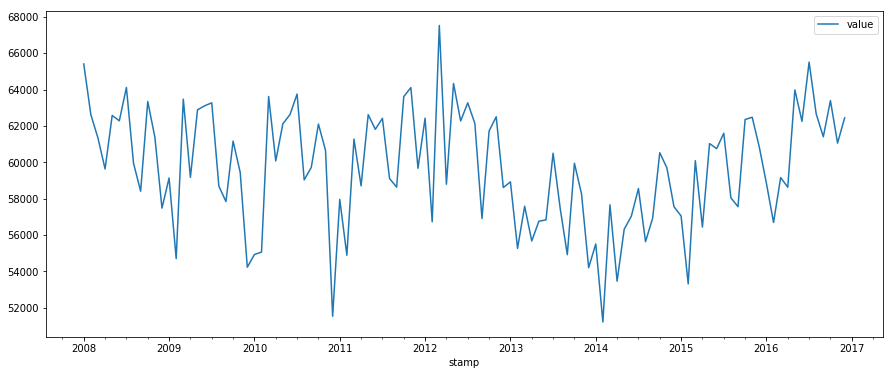

In [4]:
londonCrimes.plotCrimeRate()

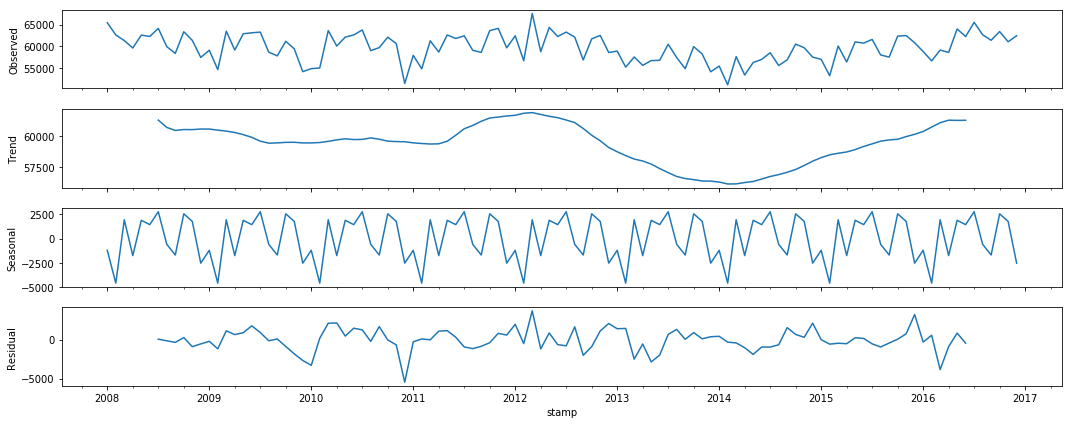

In [5]:
londonCrimes.plotCrimeRate(decomposition=True)

In [6]:
# londonCrimes.paramselection()

/home/abd/blah/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


access the instance variable 'result' for the results


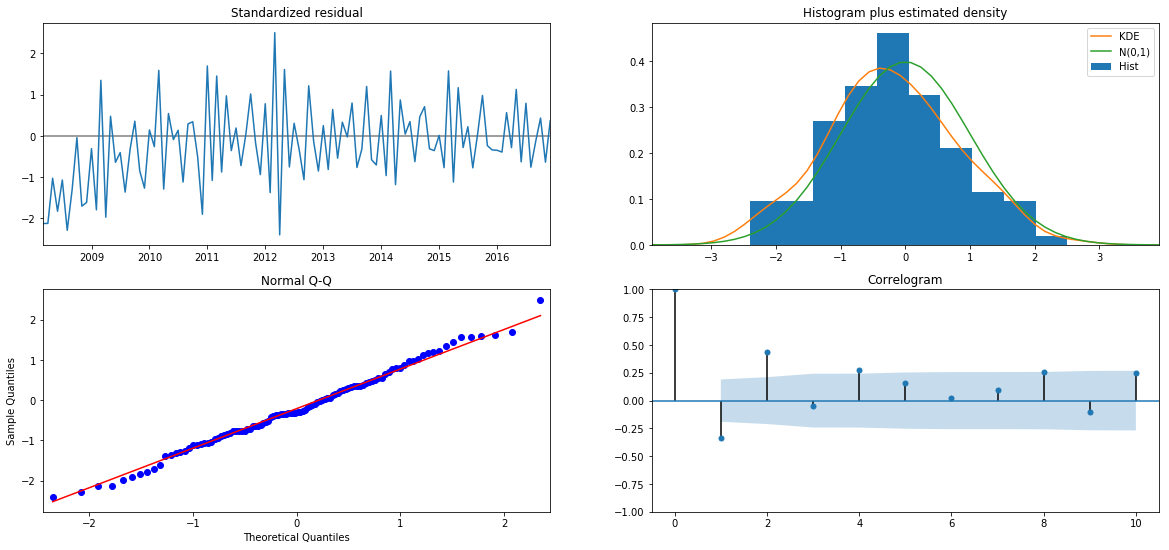

In [7]:
londonCrimes.forecastARIMA()

In [8]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(londonCrimes.timeSeries,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0555      0.212     -0.263      0.793      -0.470       0.359
ma.L1         -0.5110      0.158     -3.225      0.001      -0.822      -0.200
ar.S.L12      -0.3599      0.125     -2.884      0.004      -0.604      -0.115
sigma2       4.53e+06   6.75e+05      6.708      0.000    3.21e+06    5.85e+06


/home/abd/blah/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


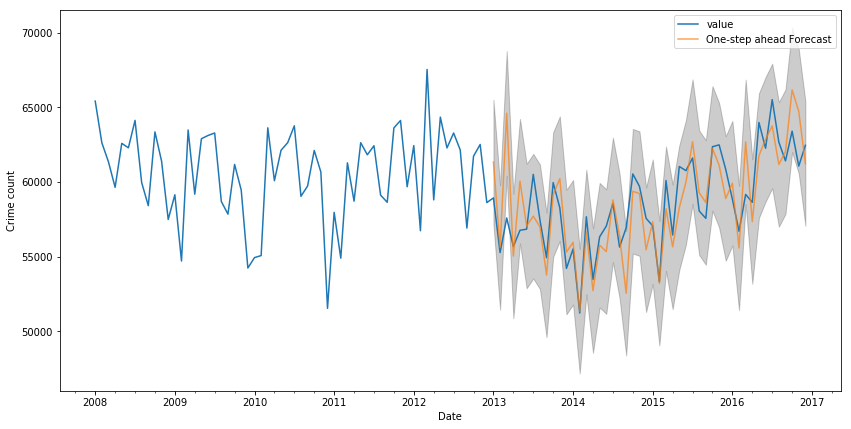

In [9]:
pred = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = londonCrimes.timeSeries['2008':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Crime count')
plt.legend()
plt.show()

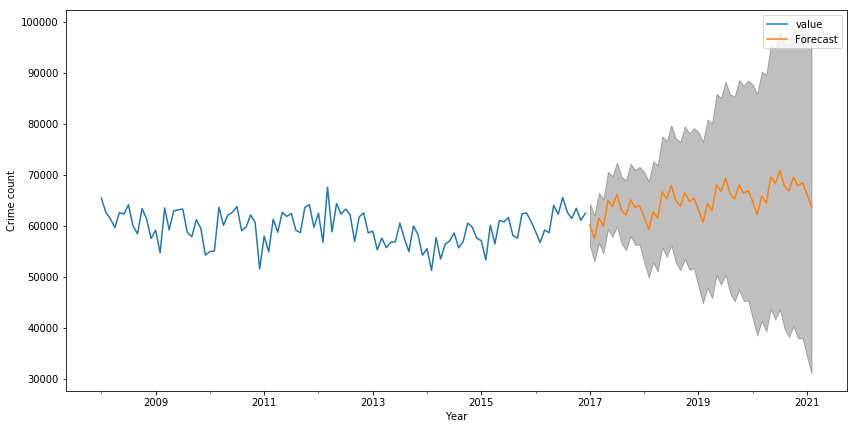

In [10]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = londonCrimes.timeSeries.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Crime count')
plt.legend()
plt.show()

In [11]:
forecastedCount = pred.predicted_mean
forecastedCount=[float(temp) for temp in forecastedCount]
actualCount = londonCrimes.timeSeries['2013-01-01':]
actualCount=np.array([float(temp) for temp in actualCount.value])
mse = (np.subtract(forecastedCount,actualCount) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3839244.74


In [12]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1959.4


In [13]:
np.mean([float(temp) for temp in londonCrimes.timeSeries.value])

59701.462962962964

So, the overall variance of ~3% isn't bad for our model. 